In [1]:
#codes from Rodrigo Lima  @rodrigolima82
from IPython.display import Image
Image(url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTlif8SG5U1SZ-8kajuOTaa4eV_6djX2qdNayeYzJBuMx7GsO3U',width=400,height=400)

boardofinnovation.com

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
import plotly.graph_objs as go
import plotly.offline as py

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/startup-investments-crunchbase/investments_VC.csv


In [3]:
df = pd.read_csv('../input/startup-investments-crunchbase/investments_VC.csv', encoding='ISO-8859-2')

In [4]:
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.dtypes

permalink                object
name                     object
homepage_url             object
category_list            object
 market                  object
 funding_total_usd       object
status                   object
country_code             object
state_code               object
region                   object
city                     object
funding_rounds          float64
founded_at               object
founded_month            object
founded_quarter          object
founded_year            float64
first_funding_at         object
last_funding_at          object
seed                    float64
venture                 float64
equity_crowdfunding     float64
undisclosed             float64
convertible_note        float64
debt_financing          float64
angel                   float64
grant                   float64
private_equity          float64
post_ipo_equity         float64
post_ipo_debt           float64
secondary_market        float64
product_crowdfunding    float64
round_A 

In [6]:
print(df.shape)

(54294, 39)


In [7]:
df.isnull().sum()

permalink                4856
name                     4857
homepage_url             8305
category_list            8817
 market                  8824
 funding_total_usd       4856
status                   6170
country_code            10129
state_code              24133
region                  10129
city                    10972
funding_rounds           4856
founded_at              15740
founded_month           15812
founded_quarter         15812
founded_year            15812
first_funding_at         4856
last_funding_at          4856
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
round_A                  4856
round_B                  4856
round_C   

Drop the rows having null values

In [8]:
df = df.dropna(subset=['founded_at', 'founded_month', 'state_code', 'founded_quarter', 'founded_year','country_code'])

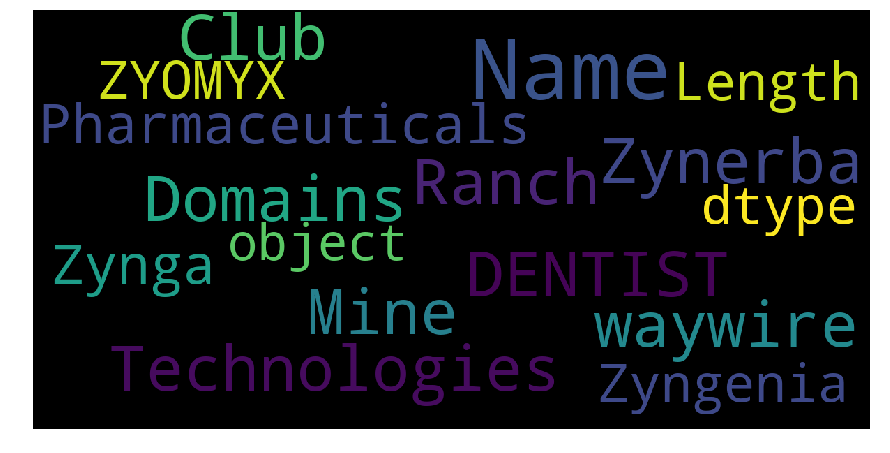

In [9]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['name'])

I read DENTIST. That's what I am, a DDS.

In [10]:
cnt_srs = df['name'].value_counts().head()
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=cnt_srs.values[::-1],
    orientation = 'h',
    marker=dict(
        color=cnt_srs.values[::-1],
        colorscale = 'Blues',
        reversescale = True
    ),
)

layout = dict(
    title='Names distribution',
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Names")

In [11]:
df['name_lenght']=df['name'].apply(len)

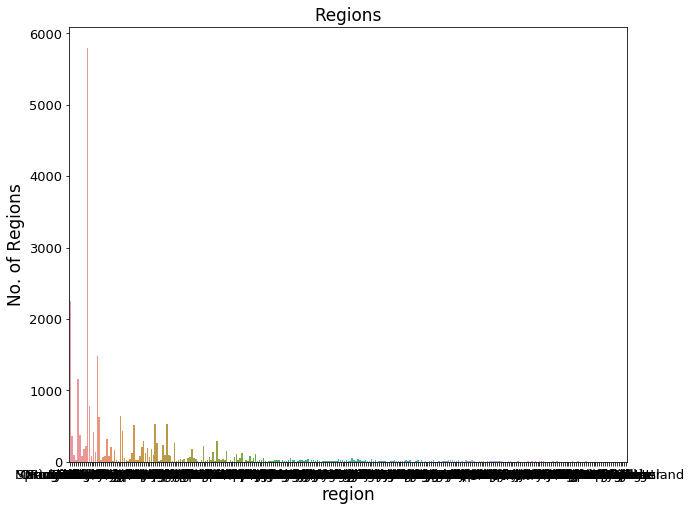

In [12]:
plt.figure(figsize=(10,8))
ax=sns.countplot(df['region'])
ax.set_xlabel(xlabel="region",fontsize=17)
ax.set_ylabel(ylabel='No. of Regions',fontsize=17)
ax.axes.set_title('Regions',fontsize=17)
ax.tick_params(labelsize=13)

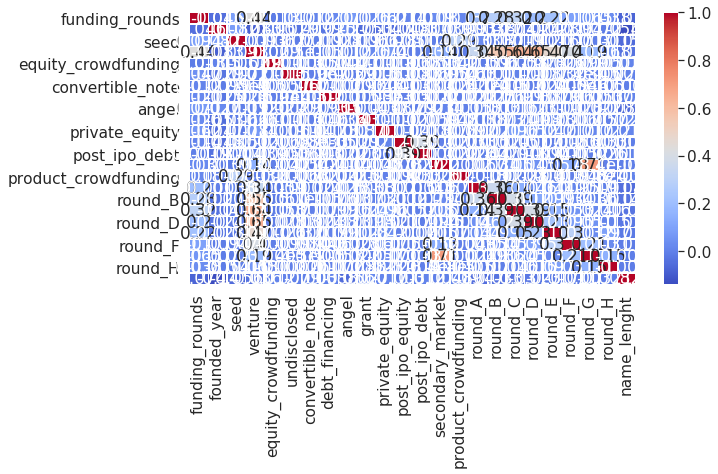

In [13]:
sns.set(font_scale=1.4)
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,linewidths=.5)

In [14]:
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer

all_text=df['name']
train_text=df['name']
y=df['region']

In [15]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(train_text)

In [16]:
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=50000)
char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.transform(train_text)

train_features = hstack([train_char_features, train_word_features])

/opt/conda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:520: UserWarning:

The parameter 'stop_words' will not be used since 'analyzer' != 'word'



In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_features, y,test_size=0.3,random_state=101)

In [18]:
import xgboost as xgb

In [19]:
xgb=xgb.XGBClassifier()

In [20]:
#xgb.fit(X_train,y_train)